In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

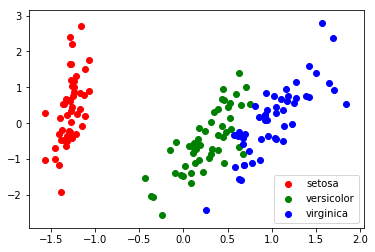

In [3]:
plot_2D(X_pca, iris.target, iris.target_names)

In [5]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
#rng = RandomState(42)

kmeans = KMeans(n_clusters=3, random_state=101)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [6]:
import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 0.33, -0.89],
       [-1.28,  0.43],
       [ 1.01,  0.71]])

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

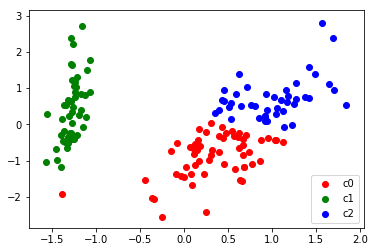

In [8]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

#### Clustering comes with assumptions: ## A clustering algorithm find clusters using specific criterion, that correspond to given assumptions. For K-means clustering, the model is that all clusters have equal, spherical variance. In the case of the iris dataset this assumption does not match the geometry of the classes, and thus the clustering cannot recover the classes.

#### Gaussian Mixture Models: we can choose a different set of assumptions using a Gaussian Mixture Model (GMM). The GMM can be used to relax the assumptions of equal variance or of sphericality. However, the less assumptions, the more the problem is ill-posed and hard to learn. The covariance_type argument of the GMM controls these assumptions. For the iris dataset, we will use the 'tied' mode, which imposes the same covariance for each classes. This makes the covariance learning problem easier.

Text(0.5, 1.0, 'True labels')

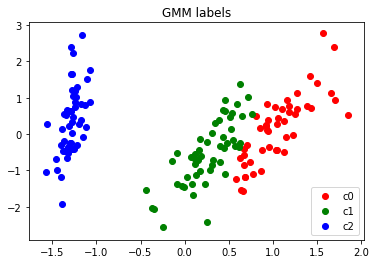

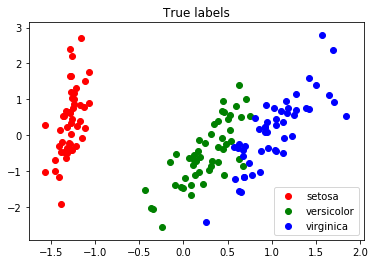

In [10]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3, covariance_type='tied')
gmm.fit(X_pca)

plot_2D(X_pca, gmm.predict(X_pca), ["c0", "c1", "c2"])
plt.title('GMM labels')

plot_2D(X_pca, iris.target, iris.target_names)
plt.title('True labels')